# 1.**Discuss the scenarios where multithreading is preferable to multiprocessing and scenarios where multiprocessing is a better choice.**  

**Ans:**

Multithreading vs Multiprocessing: Choosing the Right Approach

Both multithreading and multiprocessing are used for concurrent execution, but they serve different purposes and are suited for different scenarios.

Multithreading:

Preferable scenarios:

1. I/O-bound operations: Multithreading excels in tasks involving waiting for I/O operations, such as network requests, database queries, or file access.
2. GUI applications: Multithreading helps maintain responsiveness in graphical user interfaces by performing tasks in the background.
3. Cooperative scheduling: When threads need to cooperate and share resources, multithreading is a better choice.
4. Low-memory footprint: Multithreading requires less memory overhead compared to multiprocessing.

Multiprocessing:

Preferable scenarios:

1. CPU-bound operations: Multiprocessing is ideal for computationally intensive tasks, such as scientific simulations, data compression, or encryption.
2. Parallel execution: When tasks can be executed independently and concurrently, multiprocessing provides better scalability.
3. High-memory requirements: Multiprocessing allows each process to have its own memory space, making it suitable for memory-intensive tasks.
4. Fault tolerance: If one process crashes, others can continue running, providing fault tolerance.

Key differences:

1. Threads vs Processes: Multithreading uses threads within a single process, while multiprocessing uses separate processes.
2. Memory sharing: Multithreading shares memory between threads, whereas multiprocessing uses separate memory spaces.
3. Synchronization: Multithreading requires synchronization mechanisms to avoid data corruption, whereas multiprocessing avoids this issue due to separate memory spaces

# 2. Describe what a process pool is and how it helps in managing multiple processes efficiently.

Ans:





Process Pool:

A process pool is a group of worker processes that can be used to execute multiple tasks concurrently, improving overall processing efficiency. It's a high-level concurrency construct that abstracts away the complexity of managing multiple processes.

Key Characteristics:

1. Multiple worker processes: A pool of processes is created, each capable of executing tasks independently.
2. Task queue: Tasks are submitted to a queue, which is then processed by available worker processes.
3. Dynamic allocation: Worker processes are dynamically allocated and deallocated as needed.
4. Synchronization: Process pools handle synchronization and communication between worker processes.

Benefits:

1. Improved concurrency: Process pools enable true parallelism, leveraging multiple CPU cores.
2. Efficient resource utilization: Worker processes are reused, reducing overhead and memory usage.
3. Scalability: Process pools can handle large numbers of tasks and scale with system resources.
4. Fault tolerance: If a worker process fails, the pool can continue processing tasks.

How Process Pools Help:

1. Load balancing: Distributes tasks evenly among worker processes, ensuring efficient resource utilization.
2. Task management: Handles task scheduling, execution, and monitoring.
3. Error handling: Provides mechanisms for handling errors and exceptions.
4. Communication: Facilitates communication between worker processes and the main process.

Use Cases:

1. Scientific computing: Process pools accelerate computationally intensive tasks.
2. Data processing: Efficiently handles large datasets and parallelizable tasks.
3. Machine learning: Speeds up model training and prediction.
4. Web scraping: Concurrently fetches web pages

# 3. Explain what multiprocessing is and why it is used in Python programs.

Ans:

Multiprocessing in Python:

Multiprocessing is a technique where multiple processes are executed concurrently, leveraging multiple CPU cores to improve overall processing efficiency.

What is Multiprocessing?

Multiprocessing involves:

1. Creating multiple processes
2. Executing tasks independently in each process
3. Communicating between processes (if needed)
4. Managing process synchronization and errors

Why Use Multiprocessing in Python?

1. CPU-bound tasks: Multiprocessing accelerates computationally intensive tasks, such as scientific simulations, data compression, and encryption.
2. Parallel execution: Multiprocessing enables true parallelism, leveraging multiple CPU cores to reduce processing time.
3. Scalability: Multiprocessing scales with system resources, making it suitable for large datasets and complex computations.
4. Fault tolerance: If one process crashes, others can continue running, providing fault tolerance.

Use Cases:

1. Scientific computing (e.g., climate modeling)
2. Data processing (e.g., image processing, data compression)
3. Machine learning (e.g., model training)
4. Web scraping
5. Video processing

Best Practices:

1. Use if __name__ == '__main__': to protect multiprocessing code.
2. Use queues or pipes for inter-process communication.
3. Avoid shared state; use synchronization primitives instead.
4. Monitor process performance and adjust parameters accordingly

#4. Write a Python program using multithreading where one thread adds numbers to a list, and another thread removes numbers from the list. Implement a mechanism to avoid race conditions using threading.Lock.

In [1]:




import threading
import random
import time

# Shared list
numbers = []

# Lock for synchronization
lock = threading.Lock()

# Function to add numbers to the list
def add_numbers():
    for _ in range(10):
        with lock:  # Acquire lock
            num = random.randint(1, 100)
            numbers.append(num)
            print(f"Added: {num}")
        time.sleep(0.5)  # Simulate work

# Function to remove numbers from the list
def remove_numbers():
    for _ in range(10):
        with lock:  # Acquire lock
            if numbers:
                num = numbers.pop(0)
                print(f"Removed: {num}")
            else:
                print("List is empty")
        time.sleep(0.7)  # Simulate work

# Create threads
add_thread = threading.Thread(target=add_numbers)
remove_thread = threading.Thread(target=remove_numbers)

# Start threads
add_thread.start()
remove_thread.start()

# Wait for threads to finish
add_thread.join()
remove_thread.join()

print("Final list:", numbers)

Added: 16
Removed: 16
Added: 71
Removed: 71
Added: 90
Removed: 90
Added: 68
Added: 39
Removed: 68
Added: 98
Removed: 39
Added: 40
Removed: 98
Added: 42
Added: 71
Removed: 40
Added: 54
Removed: 42
Removed: 71
Removed: 54
Final list: []


# 5.Describe the methods and tools available in Python for safely sharing data between threads and processes.



Sharing Data between Threads:

1. Locks (threading.Lock): Ensure exclusive access to shared resources.
2. RLocks (threading.RLock): Allow multiple acquisitions of the lock by the same thread.
3. Semaphores (threading.Semaphore): Control access to shared resources by multiple threads.
4. Condition Variables (threading.Condition): Enable threads to wait for specific conditions.
5. Queues (queue.Queue): Thread-safe FIFO data structures.
6. Shared Memory (multiprocessing.sharedctypes): Share memory between threads.

Sharing Data between Processes:

1. Pipes (multiprocessing.Pipe): Unidirectional communication channels.
2. Queues (multiprocessing.Queue): Process-safe FIFO data structures.
3. Shared Memory (multiprocessing.sharedctypes): Share memory between processes.
4. Managers (multiprocessing.Manager): Provide shared resources, such as lists and dictionaries.
5. Server-based approaches: Use TCP/IP or Unix sockets for inter-process communication.

Tools and Libraries:

1. threading: Built-in Python module for threading.
2. multiprocessing: Built-in Python module for multiprocessing.
3. concurrent.futures: High-level interface for parallelism.
4. queue: Built-in Python module for queues.
5. socket: Built-in Python module for network communication.

Best Practices:

1. Minimize shared data: Reduce the need for synchronization.
2. Use synchronization primitives: Locks, semaphores, and condition variables.
3. Avoid shared mutable state: Use immutable data structures or synchronization.
4. Use high-level interfaces: concurrent.futures, multiprocessing.Manager.
5. Document shared data: Clearly indicate shared resources.

# 6. Discuss why it’s crucial to handle exceptions in concurrent programs and the techniques available for doing so.

Ans:

Handling Exceptions in Concurrent Programs:

Handling exceptions in concurrent programs is crucial due to the following reasons:

Why Handle Exceptions?

1. Prevent Program Termination: Unhandled exceptions can terminate the entire program, losing progress and potentially causing data corruption.
2. Maintain Program Integrity: Exceptions can compromise program correctness, leading to unexpected behavior or errors.
3. Ensure Resource Cleanup: Exceptions can leave resources (e.g., locks, sockets) in an inconsistent state.
4. Improve Debugging: Exception handling provides valuable information for debugging.

Challenges in Concurrent Exception Handling

1. Identifying Exception Sources: Difficulty determining which thread or process triggered the exception.
2. Synchronizing Exception Handling: Coordinating exception handling across multiple threads or processes.
3. Resource Cleanup: Ensuring resources are released properly.

Techniques for Handling Exceptions

Thread-Level Exception Handling

1. try-except Blocks: Wrap thread-specific code in try-except blocks.
2. Thread-Specific Exception Handlers: Use threading.excepthook to handle thread-specific exceptions.

Process-Level Exception Handling

1. try-except Blocks: Wrap process-specific code in try-except blocks.
2. Process-Specific Exception Handlers: Use multiprocessing.excepthook to handle process-specific exceptions.

Concurrent Exception Handling Mechanisms

1. Queue-Based Exception Handling: Use queues to propagate exceptions between threads or processes.
2. Event-Based Exception Handling: Use events to signal exceptions between threads or processes.
3. Shared Memory-Based Exception Handling: Use shared memory to store exception information.

Best Practices

1. Use Centralized Exception Handling: Designate a single point for exception handling.
2. Log Exceptions: Record exceptions for debugging and analysis.
3. Test Exception Handling: Verify exception handling mechanisms.

# 7. Create a program that uses a thread pool to calculate the factorial of numbers from 1 to 10 concurrently.Use concurrent.futures.ThreadPoolExecutor to manage the threads.

In [2]:
import concurrent.futures
import math

def calculate_factorial(n):
    """Calculate the factorial of a number."""
    result = math.factorial(n)
    print(f"Factorial of {n}: {result}")

def main():
    """Main function."""
    numbers = range(1, 11)  # Numbers from 1 to 10
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Submit tasks to the thread pool
        futures = [executor.submit(calculate_factorial, n) for n in numbers]
        # Wait for all tasks to complete
        concurrent.futures.wait(futures)

if __name__ == "__main__":
    main()

Factorial of 1: 1
Factorial of 2: 2
Factorial of 3: 6
Factorial of 4: 24
Factorial of 5: 120
Factorial of 6: 720
Factorial of 7: 5040
Factorial of 8: 40320
Factorial of 9: 362880
Factorial of 10: 3628800


# 8. Create a Python program that uses multiprocessing.Pool to compute the square of numbers from 1 to 10 in parallel. Measure the time taken to perform this computation using a pool of different sizes (e.g., 2, 4, 8 processes).

Pool size: 1, Execution time: 0.0262 seconds
Pool size: 2, Execution time: 0.0238 seconds
Pool size: 4, Execution time: 0.0563 seconds
Pool size: 8, Execution time: 0.0757 seconds


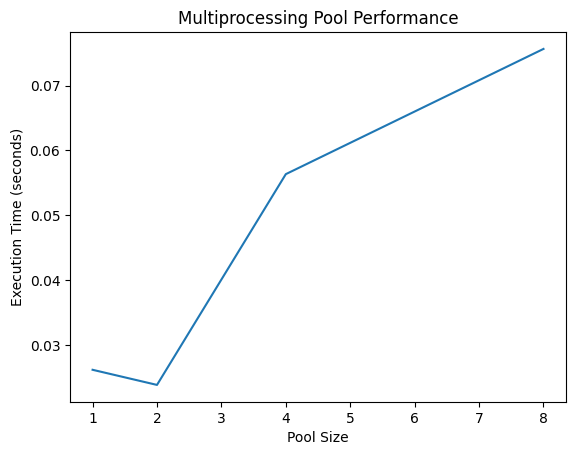

In [3]:
import multiprocessing
import time
import matplotlib.pyplot as plt

def square(x):
    """Calculate the square of a number."""
    return x ** 2

def main():
    """Main function."""
    numbers = range(1, 11)  # Numbers from 1 to 10
    pool_sizes = [1, 2, 4, 8]  # Different pool sizes

    times = []  # Store execution times

    for pool_size in pool_sizes:
        start_time = time.time()
        with multiprocessing.Pool(processes=pool_size) as pool:
            results = pool.map(square, numbers)
        end_time = time.time()
        execution_time = end_time - start_time
        times.append(execution_time)
        print(f"Pool size: {pool_size}, Execution time: {execution_time:.4f} seconds")

    # Plot execution times
    plt.plot(pool_sizes, times)
    plt.xlabel("Pool Size")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Multiprocessing Pool Performance")
    plt.show()

if __name__ == "__main__":
    main()